In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append("../src/")

In [4]:
from experiments.unify_results import load_data

In [5]:
df = load_data("../results/edd/")

In [6]:
df.shape

(600, 8)

In [7]:
df["len"] = df["detected_cps_at"].apply(lambda z : len(z))

In [8]:
df = df[df["len"] > 0]

In [9]:
df["edd"] = df["detected_cps_at"].apply(lambda z : z[0])

In [10]:
df.config = df.config.str[10:-1].astype(float)

In [11]:
df = df[df["edd"] > 512]

In [12]:
df["edd"] = df["edd"] - 512

In [13]:
df

,algorithm,config,dataset,actual_cps,detected_cps,detected_cps_at,runtime,percent_changes_detected,len,edd
0,MMDEW,0.046416,NormalToMixed1536,[512],[],[768],2.392493,100.0,1,256
1,MMDEW,0.010000,NormalToLaplace1536,[512],[],[576],1.672424,100.0,1,64
2,MMDEW,0.464159,NormalToLaplace1536,[512],[],[536],1.603697,100.0,1,24
3,MMDEW,0.215443,NormalToUnif1536,[512],[],[576],1.805391,100.0,1,64
4,MMDEW,0.004642,NormalToLaplace1536,[512],[],[608],2.679558,100.0,1,96
...,...,...,...,...,...,...,...,...,...,...
592,MMDEW,0.001000,NormalToLaplace1536,[512],[],[624],1.887238,100.0,1,112
595,MMDEW,0.464159,NormalToUnif1536,[512],[],[536],2.565380,100.0,1,24
597,MMDEW,0.100000,NormalToMixed1536,[512],[],[640],1.703640,100.0,1,128
598,MMDEW,0.002154,NormalToLaplace1536,[512],[],[632],2.545733,100.0,1,120


<Axes: xlabel='config', ylabel='edd'>

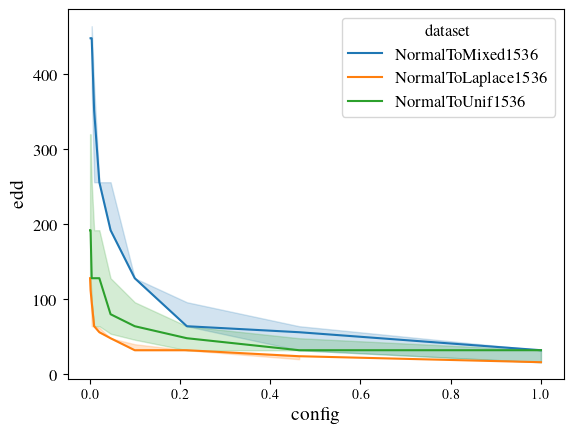

In [14]:
sns.lineplot(data=df, x="config", y="edd", hue="dataset", estimator="median")

In [15]:
df.to_csv("../results/edd.csv")